# Stock Market Prediction And Forecasting Using Stacked LSTM


In [66]:
### Keras and Tensorflow >2.0

In [67]:
### Data Collection (setting API to retrieve data from Apple Stock market)
import pandas_datareader as pdr
key="2037a73e3499c3d4626634250081fef5761f0cd8"

In [68]:
# Creating a dataframe to collect the data from apple stock market site which is tiingo.

df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\18388\AppData\Local\Temp\ipykernel_16008\1605427980.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [69]:
#converting the data into csv format
df.to_csv('AAPL.csv')

In [70]:
import pandas as pd

In [71]:
df=pd.read_csv('AAPL.csv')

In [72]:

df.head(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-06 00:00:00+00:00,208.48,208.84,203.50,204.29,32443113,50.174299,50.260940,48.975777,49.165904,129772452,0.00,1.0
1,AAPL,2019-05-07 00:00:00+00:00,202.86,207.42,200.83,205.88,38763698,48.821750,49.919192,48.333195,49.548565,155054792,0.00,1.0
2,AAPL,2019-05-08 00:00:00+00:00,202.90,205.34,201.75,201.90,26339504,48.831376,49.418604,48.554609,48.590709,105358016,0.00,1.0
3,AAPL,2019-05-09 00:00:00+00:00,200.72,201.68,196.66,200.40,34908607,48.306722,48.537762,47.329613,48.229708,139634428,0.00,1.0
4,AAPL,2019-05-10 00:00:00+00:00,197.18,198.85,192.77,197.42,41208712,47.640074,48.043557,46.574587,47.698059,164834848,0.77,1.0
5,AAPL,2019-05-13 00:00:00+00:00,185.72,189.48,182.85,187.71,57430623,44.871257,45.779700,44.177845,45.352055,229722492,0.00,1.0
6,AAPL,2019-05-14 00:00:00+00:00,188.66,189.70,185.41,186.41,36529677,45.581582,45.832853,44.796359,45.037966,146118708,0.00,1.0
7,AAPL,2019-05-15 00:00:00+00:00,190.92,191.75,186.02,186.27,26544718,46.127614,46.328147,44.943739,45.004141,106178872,0.00,1.0
8,AAPL,2019-05-16 00:00:00+00:00,190.08,192.47,188.84,189.91,33031364,45.924664,46.502105,45.625071,45.883591,132125456,0.00,1.0
9,AAPL,2019-05-17 00:00:00+00:00,189.00,190.90,186.76,186.93,32879090,45.663728,46.122782,45.122528,45.163602,131516360,0.00,1.0


In [73]:

df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1249,AAPL,2024-04-22 00:00:00+00:00,165.84,167.260,164.7700,165.515,48116443,165.84,167.260,164.7700,165.515,48116443,0.0,1.0
1250,AAPL,2024-04-23 00:00:00+00:00,166.90,167.050,164.9200,165.350,49537761,166.90,167.050,164.9200,165.350,49537761,0.0,1.0
1251,AAPL,2024-04-24 00:00:00+00:00,169.02,169.300,166.2100,166.540,48251835,169.02,169.300,166.2100,166.540,48251835,0.0,1.0
1252,AAPL,2024-04-25 00:00:00+00:00,169.89,170.610,168.1511,169.525,50558329,169.89,170.610,168.1511,169.525,50558329,0.0,1.0
1253,AAPL,2024-04-26 00:00:00+00:00,169.30,171.340,169.1800,169.880,44838354,169.30,171.340,169.1800,169.880,44838354,0.0,1.0
1254,AAPL,2024-04-29 00:00:00+00:00,173.50,176.030,173.1000,173.370,68169419,173.50,176.030,173.1000,173.370,68169419,0.0,1.0
1255,AAPL,2024-04-30 00:00:00+00:00,170.33,174.990,170.0000,173.330,65934776,170.33,174.990,170.0000,173.330,65934776,0.0,1.0
1256,AAPL,2024-05-01 00:00:00+00:00,169.30,172.705,169.1100,169.580,50383147,169.30,172.705,169.1100,169.580,50383147,0.0,1.0
1257,AAPL,2024-05-02 00:00:00+00:00,173.03,173.415,170.8900,172.510,94214915,173.03,173.415,170.8900,172.510,94214915,0.0,1.0
1258,AAPL,2024-05-03 00:00:00+00:00,183.38,187.000,182.6600,186.645,163224109,183.38,187.000,182.6600,186.645,163224109,0.0,1.0


In [74]:

df1=df.reset_index()['close']

In [75]:
df1

0       208.48
1       202.86
2       202.90
3       200.72
4       197.18
         ...  
1254    173.50
1255    170.33
1256    169.30
1257    173.03
1258    183.38
Name: close, Length: 1259, dtype: float64

Text(0.5, 1.0, 'Distribution of closing numbers of a particular day versus index')

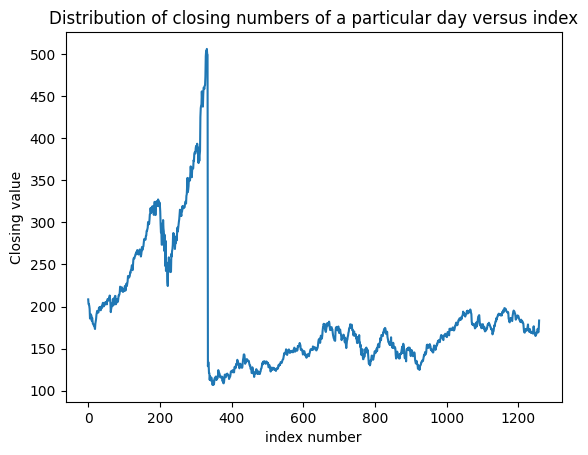

In [76]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.ylabel('Closing value')
plt.xlabel('index number')
plt.title('Distribution of closing numbers of a particular day versus index')

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [77]:

import numpy as np

In [78]:

df1

0       208.48
1       202.86
2       202.90
3       200.72
4       197.18
         ...  
1254    173.50
1255    170.33
1256    169.30
1257    173.03
1258    183.38
Name: close, Length: 1259, dtype: float64

In [79]:
#Importing Scaler function to reshape the dataframe
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [80]:
print(df1)

[[0.25457733]
 [0.24050094]
 [0.24060113]
 ...
 [0.15644333]
 [0.16578585]
 [0.19170946]]


In [81]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(818, 441)

In [82]:

train_data

array([[2.54577332e-01],
       [2.40500939e-01],
       [2.40601127e-01],
       [2.35140889e-01],
       [2.26274264e-01],
       [1.97570445e-01],
       [2.04934252e-01],
       [2.10594865e-01],
       [2.08490920e-01],
       [2.05785848e-01],
       [1.90983093e-01],
       [1.99774577e-01],
       [1.90206637e-01],
       [1.82391985e-01],
       [1.80663745e-01],
       [1.78810269e-01],
       [1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],
       [2.08666249e-01],
       [2.14752661e-01],
       [2.20338134e-01],
       [2.18785222e-01],
       [2.18685034e-01],
       [2.15153413e-01],
       [2.18033813e-01],
       [2.29455229e-01],
       [2.28002505e-01],
       [2.31984972e-01],
       [2.30281778e-01],
       [2.29780839e-01],
       [2.22241703e-01],
       [2.32836569e-01],
       [2.32686287e-01],
       [2.28127740e-01],
       [2.37219787e-01],


In [83]:

import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [84]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [85]:

print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [86]:

print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [87]:

# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [88]:

### Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [89]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

C:\Users\18388\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                    │ (None, 100, 50)         │        10,400 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                    │ (None, 100, 50)         │        20,200 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                    │ (None, 50)              │        20,200 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_2 (Dense)                  │ (None, 1)               │            51 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - loss: 0.0707 - val_loss: 4.1058e-04
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0156 - val_loss: 0.0021
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0178 - val_loss: 2.6111e-04
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0081 - val_loss: 0.0010
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0108 - val_loss: 0.0030
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0097 - val_loss: 5.1253e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0096 - val_loss: 0.0010
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0060 - val_loss: 2.4801e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0045 - val_loss: 2.2236e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0060 - val_loss: 9.2058e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0056 - val_loss: 0.0012
Epoch 12/100
12/12 ━━━━━━━━━

In [94]:

import tensorflow as tf

In [95]:
tf.__version__

'2.16.1'

In [96]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [97]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [98]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

208.51672676211808

In [99]:

### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

173.69269456418226

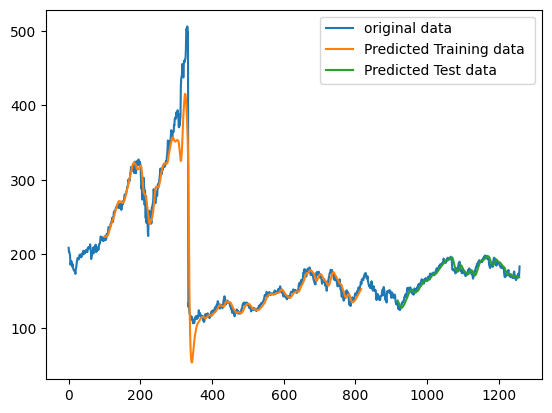

In [100]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["original data", "Predicted Training data ","Predicted Test data"], loc="upper right")
plt.show()

In [101]:
len(test_data)

441

In [102]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [104]:
temp_input

[0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 0.21803381340012518,
 0.2212648716343143,
 0.21956167814652466,
 0.2187351283656856,
 0.21435190983093294,
 0.2126236693800876,
 0.2033813400125234,
 0.1942642454602379,
 0.2004257983719474,
 0.19789605510331865,
 0.20247964934251717,
 0.20653725735754536,
 0.20681277395115838,
 0.20408265497808387,
 0.2054101440200375,
 0.20115216030056354,
 0.19586725109580455,
 0.1936380713838447,
 0.19291170945522856,
 0

In [105]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1588588]
101
1 day input [0.22008766 0.22822793 0.22860363 0.2272511  0.22304321 0.22567314
 0.22038823 0.22001252 0.21730745 0.21592987 0.21618034 0.21725736
 0.21462743 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969
 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617
 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513
 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606
 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216
 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448
 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025 0.1851221
 0.18239198 0.17097057 0.15849718 0.15599249 0.15569192 0.16002505
 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892 0.16751409
 0.17342517 0.17991234 0.16162805 0.16390733 0.16032561 0.15747026
 0.16648716 0.16190357 0.15827176 0.15529117 0.15731997 0.15524108
 0.15714465 0.15431434 0.15737007 0.15263619 0.17082029 0.17460238
 0.16493425 0.15664371 0.15318723 0

In [106]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [107]:

import matplotlib.pyplot as plt

In [108]:
len(df1)

1259

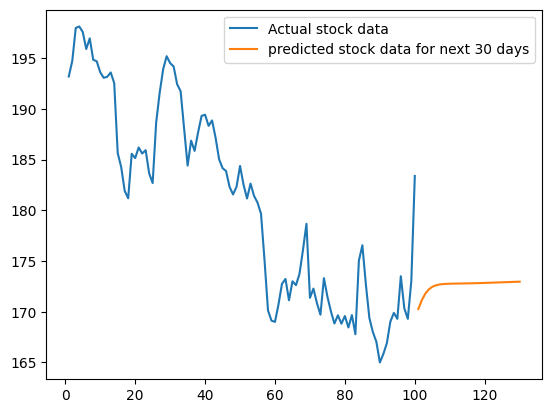

In [109]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.legend(["Actual stock data", "predicted stock data for next 30 days"], loc="upper right")

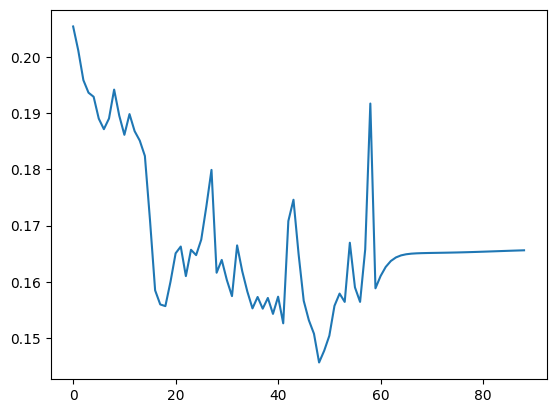

In [110]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [111]:

df3=scaler.inverse_transform(df3).tolist()

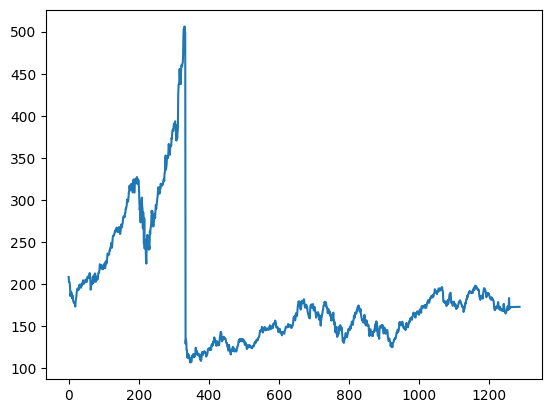

In [112]:
plt.plot(df3)